前言

       我们接着上一期matplotlib绘图内容，讲解一下关于折线图的绘制，折线图一般是用来表示某个数值变量随着时间的推移而形成的趋势，这种图还是比较常见的，如经济走势图、销售波动图、PV监控图等。在Python的matplotlib模块中，我们可以调用plot函数就能实现折线图的绘制了，先来看看这个函数的一些参数含义。

plot函数的参数解读

       matplotlib模块中plot函数语法及参数含义：

In [ ]:
plt.hist(x,y,linestyle,
        linewidth,color,marker,
        markersize,markeredgecolor,
        markerfactcolor,label,alpha)

In [ ]:
x：指定折线图的x轴数据；
y：指定折线图的y轴数据；
linestyle：指定折线的类型，可以是实线、虚线、点虚线、点点线等，默认文实线；
linewidth：指定折线的宽度
marker：可以为折线图添加点，该参数是设置点的形状；
markersize：设置点的大小；
markeredgecolor：设置点的边框色；
markerfactcolor：设置点的填充色；
label：为折线图添加标签，类似于图例的作用；

一元折线图的绘制

案例：每天进步一点点2015公众号文章阅读人数

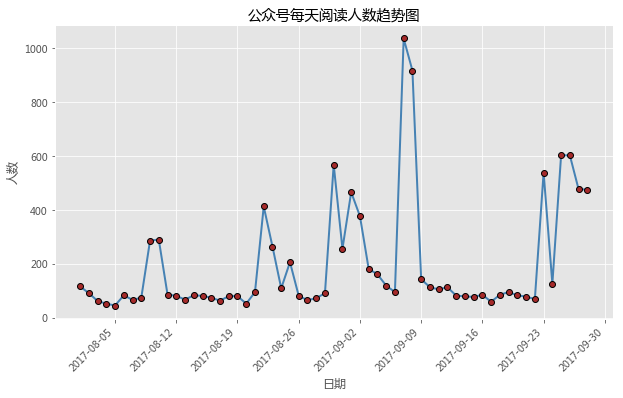

In [2]:
# 导入模块
import pandas as pd
import matplotlib.pyplot as plt

# 设置绘图风格
plt.style.use('ggplot')
# 设置中文编码和负号的正常显示
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

# 读取需要绘图的数据
article_reading = pd.read_excel('wechart.xlsx')
# 取出8月份至9月28日的数据
sub_data = article_reading.loc[article_reading.date >= '2017-08-01' ,:]

# 设置图框的大小
fig = plt.figure(figsize=(10,6))
# 绘图
plt.plot(sub_data.date, # x轴数据
         sub_data.article_reading_cnts, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='brown') # 点的填充色

# 添加标题和坐标轴标签
plt.title('公众号每天阅读人数趋势图')
plt.xlabel('日期')
plt.ylabel('人数')

# 剔除图框上边界和右边界的刻度
plt.tick_params(top = 'off', right = 'off')

# 为了避免x轴日期刻度标签的重叠，设置x轴刻度自动展现，并且45度倾斜
fig.autofmt_xdate(rotation = 45)

# 显示图形
plt.show()

  由于x轴是日期型数据，当数据量一多的时候，就会导致刻度标签的重叠或拥挤，为了防止重叠的产生，我们需要让日期型的x轴刻度标签自动展现，从而避免重叠的现象。下面两幅图是对比自动刻度标签的前后变化：

 可能你并不满足这样的刻度标签展现形式，你想以个性化的展现方式，如“YYYY-MM-DD”的显示方式，同时又想以固定的几天作为间隔，这样的设置又该如何实现？其实非常的简单，只需要在上面代码的基础上添加几行代码就可以轻松搞定。

一元折线图的绘制—图形优化

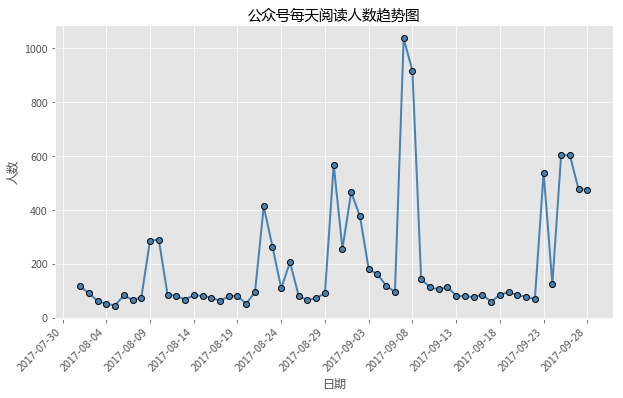

In [3]:
# 导入模块
import matplotlib as mpl

# 设置图框的大小
fig = plt.figure(figsize=(10,6))
# 绘图
plt.plot(sub_data.date, # x轴数据
         sub_data.article_reading_cnts, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue') # 点的填充色

# 添加标题和坐标轴标签
plt.title('公众号每天阅读人数趋势图')
plt.xlabel('日期')
plt.ylabel('人数')

# 剔除图框上边界和右边界的刻度
plt.tick_params(top = 'off', right = 'off')

# 获取图的坐标信息
ax = plt.gca()
# 设置日期的显示格式  
date_format = mpl.dates.DateFormatter("%Y-%m-%d")  
ax.xaxis.set_major_formatter(date_format) 

# 设置x轴显示多少个日期刻度
#xlocator = mpl.ticker.LinearLocator(10)
# 设置x轴每个刻度的间隔天数
xlocator = mpl.ticker.MultipleLocator(5)
ax.xaxis.set_major_locator(xlocator)

# 为了避免x轴日期刻度标签的重叠，设置x轴刻度自动展现，并且45度倾斜
fig.autofmt_xdate(rotation = 45)

# 显示图形
plt.show()

多元折线图的绘制

       如果你需要在一张图形中画上两条折线图，也很简单，只需要在代码中写入两次plot函数即可，其他都不需要改动了。具体可以参考下面的代码逻辑：

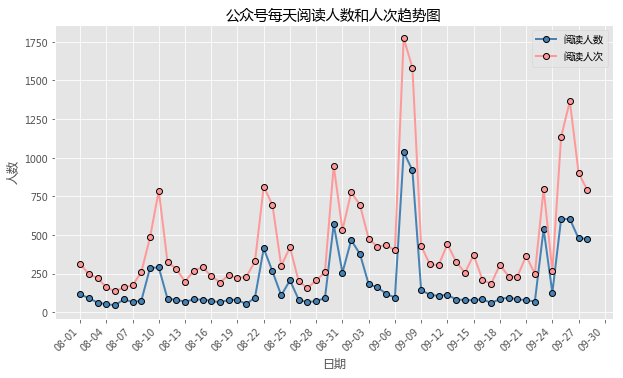

In [4]:
# 设置图框的大小
fig = plt.figure(figsize=(10,6))

# 绘图--阅读人数趋势
plt.plot(sub_data.date, # x轴数据
         sub_data.article_reading_cnts, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue', # 点的填充色
         label = '阅读人数') # 添加标签

# 绘图--阅读人次趋势
plt.plot(sub_data.date, # x轴数据
         sub_data.article_reading_times, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#ff9999', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='#ff9999', # 点的填充色
         label = '阅读人次') # 添加标签

# 添加标题和坐标轴标签
plt.title('公众号每天阅读人数和人次趋势图')
plt.xlabel('日期')
plt.ylabel('人数')

# 剔除图框上边界和右边界的刻度
plt.tick_params(top = 'off', right = 'off')

# 获取图的坐标信息
ax = plt.gca()
# 设置日期的显示格式  
date_format = mpl.dates.DateFormatter('%m-%d')  
ax.xaxis.set_major_formatter(date_format) 

# 设置x轴显示多少个日期刻度
#xlocator = mpl.ticker.LinearLocator(10)
# 设置x轴每个刻度的间隔天数
xlocator = mpl.ticker.MultipleLocator(3)
ax.xaxis.set_major_locator(xlocator)

# 为了避免x轴日期刻度标签的重叠，设置x轴刻度自动展现，并且45度倾斜
fig.autofmt_xdate(rotation = 45)

# 显示图例
plt.legend()
# 显示图形
plt.show()

两条折线图很完美的展现在一张图中，公众号的阅读人数与人次趋势完全一致，而且具有一定的周期性，即过几天就会有一个大幅上升的波动，这个主要是由于双休日的时候，时间比较空闲，就可以更新并推送文章了。